In [66]:
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns 
from scipy import stats
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

# Business Understanding  
  
This wine quality dataset come from UCI machine learning repository.(https://archive.ics.uci.edu/ml/datasets/Wine+Quality)  
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult:   http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
  
The problem is to predict the wine's quality based on its physicochemical property,in which we assume that the sensory wine quality have strong relationship with its physicochemical property. We view this problem as classification problem because the quality is not continuous numbers. 

# Data Understanding  

In [67]:
data = pd.read_csv('winequality-white.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [69]:
# As shown above, all numerical data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Correlation

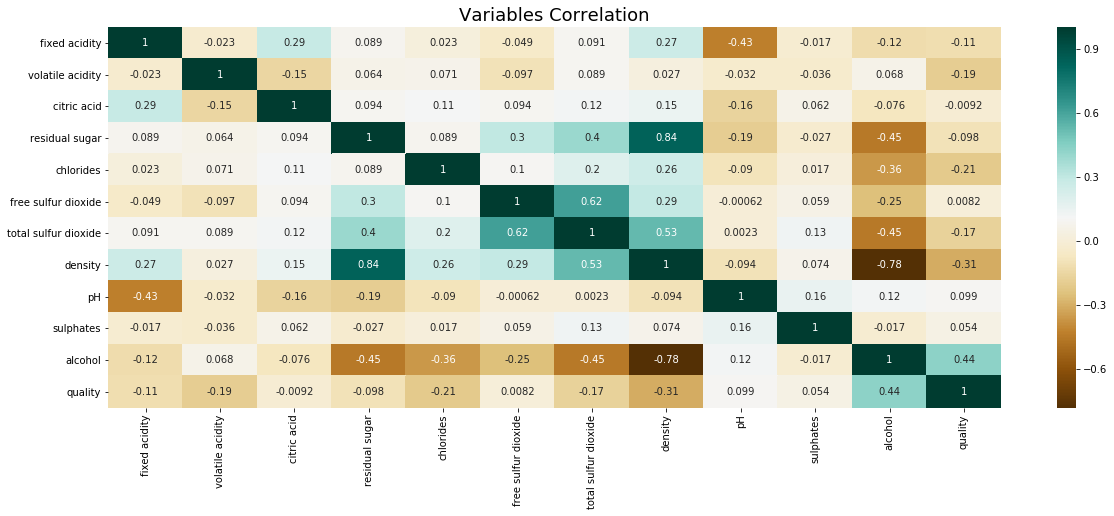

In [70]:
plt.figure(figsize = (20,7))
sns.heatmap(data.corr(), cmap ='BrBG', annot = True)
plt.title('Variables Correlation', fontsize = 18)
plt.show()

As shown above density, pH, and citric acid seems to most correlated with quality
Next we draw the distribution between quality and these attributes

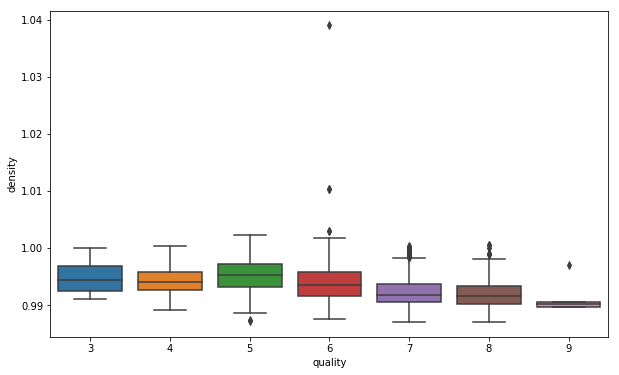

In [74]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'density', data = data)

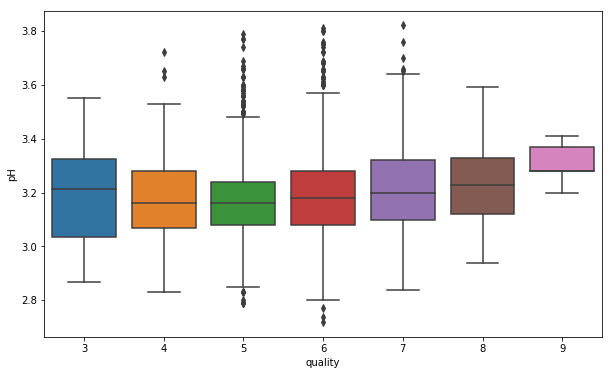

In [77]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'pH', data = data)

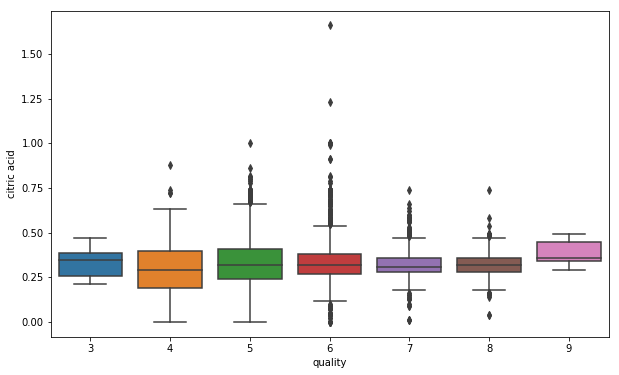

In [76]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'citric acid', data = data)

The relationship between quality and these attributes are hard to define although they have high correlation. Also there are many outliers in this dataset

## missing value

In [35]:
null_data = data[data.isnull().any(axis=1)]
display(null_data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


No missing value here 

## outliers
According to data description, there are munch more normal wines than excellent or poor ones.  
And 11 different chemical properties of the wines including density, acidity, alcohol content, etc.  
So the outliers in these attributes canonot be deleted as they are no false data or noise.  


It's valuable to show the distribution of the quality and then categorize it.  
Then the problem change into classification problem.  

# Data preprocessing

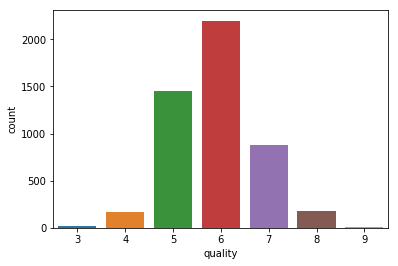

In [36]:
sns.countplot(x='quality', data=data)

In [79]:
# As shown above,since 5 and 6 count most ,5 and 6 can be categorized into normal, 7,8,9 as good. and 3 and 4 as bad.
# The problem of this categorization is that ....

reviews = []
for i in data['quality']:
    if i >= 1 and i <= 4:
        reviews.append('1')
    elif i >= 5 and i <= 6:
        reviews.append('2')
    elif i >= 7:
        reviews.append('3')
data['reviews'] = reviews

In [80]:
data['reviews'].unique()

array(['2', '3', '1'], dtype=object)

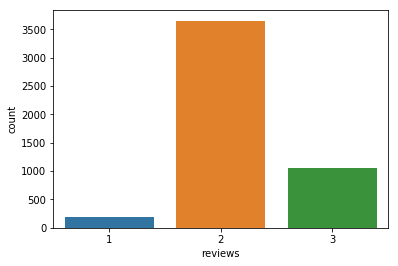

In [81]:
sns.countplot(x='reviews', data=data)

In [82]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,reviews
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2


# Modeling

In [85]:
X = np.array(data.iloc[:, 0:10]) 
y = np.array(data['reviews']) 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=5)
print(y_train.size,y_test.size)
display(X_train, y_train)

3673 1225


array([[8.5    , 0.25   , 0.31   , ..., 0.99189, 3.06   , 0.44   ],
       [7.     , 0.34   , 0.1    , ..., 0.9937 , 3.01   , 0.39   ],
       [7.1    , 0.17   , 0.31   , ..., 0.991  , 3.14   , 0.5    ],
       ...,
       [5.4    , 0.265  , 0.28   , ..., 0.99432, 3.19   , 0.38   ],
       [6.2    , 0.26   , 0.19   , ..., 0.9924 , 3.14   , 0.43   ],
       [6.9    , 0.14   , 0.38   , ..., 0.99043, 3.03   , 0.54   ]])

array(['2', '2', '2', ..., '2', '2', '2'], dtype=object)

In [58]:
def train_accuracy(model):
    model.fit(X_train, y_train)
    accuracy = model.score(X_train, y_train)
    accuracy = np.round(accuracy*100, 2)
    return accuracy

seed = 5

'''#1.LogisticRegression'''
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

'''#2.Support Vector Machines'''
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')

'''#3.Random Forest Classifier'''
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

'''#4.KNN'''
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

'''#5.Gaussian Naive Bayes'''
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

'''#6.Decision Tree Classifier'''
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = seed)

'''#7.Gradient Boosting Classifier'''
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = seed)

'''#8.Adaboost Classifier'''
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state = seed)

'''#9.ExtraTrees Classifier'''
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state = seed)

'''#10.Neural Network Classifier'''
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=1)

train_accuracy = pd.DataFrame({'Train_accuracy(%)':[train_accuracy(lr), train_accuracy(svc), train_accuracy(rf), train_accuracy(knn), train_accuracy(gnb), train_accuracy(dt), train_accuracy(gbc), train_accuracy(abc), train_accuracy(etc),train_accuracy(mlp)]})
train_accuracy.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC', 'ETC','MLP']
sorted_train_accuracy = train_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)
display(sorted_train_accuracy)


,Train_accuracy(%)
DT,100.00
ETC,100.00
RF,99.97
SVC,86.47
GBC,85.98
KNN,80.91
LR,73.95
ABC,73.86
MLP,66.76
GNB,64.58


In [59]:
def x_val_score(model):
    from sklearn.model_selection import cross_val_score
    x_val_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    x_val_score = np.round(x_val_score*100, 2)
    return x_val_score

"""10-fold cross validation to find the classifier with the best cross validation accuracy."""
x_val_score = pd.DataFrame({'X_val_score(%)':[x_val_score(lr), x_val_score(svc), x_val_score(rf), x_val_score(knn), x_val_score(gnb), x_val_score(dt), x_val_score(gbc), x_val_score(abc), x_val_score(etc),x_val_score(mlp)]})
x_val_score.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC', 'ETC','MLP']
sorted_x_val_score = x_val_score.sort_values(by = 'X_val_score(%)', ascending = False) 
display(sorted_x_val_score)


,X_val_score(%)
RF,83.86
ETC,82.20
GBC,79.28
DT,77.40
SVC,75.71
LR,73.86
MLP,73.48
ABC,73.05
KNN,71.22
GNB,64.72


## Tuning Hyperparameters

In [10]:
def tune_hyperparameters(model, params):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score
    grid = GridSearchCV(model, params, verbose = 0, cv = 10, scoring = 'accuracy', n_jobs = -1)
    grid.fit(X_train, y_train)
    best_params, best_score = grid.best_params_, np.round(grid.best_score_*100, 2)
    return best_params, best_score
best_scores = []

In [11]:
lr_params = {'penalty':['l1', 'l2'],
             'C': np.logspace(0, 4, 10)}

gbc_params = {'learning_rate': [0.01, 0.02, 0.05],
              'max_depth': [4, 6, 8],
              'max_features': [1.0, 0.3, 0.1], 
              'min_samples_split': [ 2, 3, 4],
              'random_state':[seed]}

svc_params = {'C': [6, 7, 8, 9, 10, 11, 12], 
              'kernel': ['linear','rbf'],
              'gamma': [0.5, 0.2, 0.1, 0.001, 0.0001]}

dt_params = {'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
             'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
             'random_state':[seed]}

rf_params = {'criterion':['gini','entropy'],
             'n_estimators':[10, 15, 20, 25, 30],
             'min_samples_leaf':[1, 2, 3],
             'min_samples_split':[3, 4, 5, 6, 7], 
             'max_features':['sqrt', 'auto', 'log2'],
             'random_state':[44]}

knn_params = {'n_neighbors':[3, 4, 5, 6, 7, 8],
              'leaf_size':[1, 2, 3, 5],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute']}

# GaussianNB does not accept any parameter so we don't tune hyperparameter of GaussianNB

abc_params = {'n_estimators':[1, 5, 10, 15, 20, 25, 40, 50, 60, 80, 100, 130, 160, 200, 250, 300],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5],
              'random_state':[seed]}

etc_params = {'max_depth':[None],
              'max_features':[1, 3, 10],
              'min_samples_split':[2, 3, 10],
              'min_samples_leaf':[1, 3, 10],
              'bootstrap':[False],
              'n_estimators':[100, 300],
              'criterion':["gini"], 
              'random_state':[seed]}


mlp_params = {'learning_rate': [0.05, 0.01, 0.005, 0.001],
              'hidden0__units': [4, 8, 12],
              'hidden0__type': ["Rectifier", "Sigmoid", "Tanh"]}


In [13]:


best_score, best_params = tune_hyperparameters(knn, params = knn_params)
print('Best Score:', best_score)
print('And Best Parameters:', best_params)


Best Score: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 8, 'weights': 'distance'}
And Best Parameters: 56.03


In [ ]:
tunned_scores = pd.DataFrame({'Tunned_accuracy(%)': [lr_best_score, gbc_best_score, svc_best_score, dt_best_score, rf_best_score, knn_best_score, abc_best_score, etc_best_score,mlp_best_score]})
tunned_scores.index = ['LR', 'GBC', 'SVC', 'DT', 'RF', 'KNN', 'ABC', 'ETC','MLP']
sorted_tunned_scores = tunned_scores.sort_values(by = 'Tunned_accuracy(%)', ascending = False)
display(sorted_tunned_scores)